In [1]:
#Import library and read data
import pandas as pd
from sklearn.model_selection import train_test_split


# ----------------- Load & prep -----------------
data = pd.read_csv(r"C:\Users\mahu123a\Documents\Data\RandomDataGeneration_Gendreau\RandomData_3_20_20/RandomData_3_20_20.csv")
data.dropna(inplace=True)

drop_cols = ["filename", "Route"]
labelcol  = "CP Status"

y = data[labelcol].astype(int)
X = data.drop(columns=drop_cols + [labelcol])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)


###We import the model that will be used.
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
# Create an instance of the model.
logreg = LogisticRegressionCV(class_weight = 'balanced', max_iter = 1000, n_jobs = 1, cv = 5)
# Training the model.
logreg.fit(X_train,y_train)
# Do prediction.
y_pred=logreg.predict(X_test)

from sklearn.metrics import (
    confusion_matrix, accuracy_score, balanced_accuracy_score,
    f1_score, roc_auc_score, classification_report
)

# Probabilities for AUC
y_proba = logreg.predict_proba(X_test)[:, 1]

# Core metrics
acc     = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)   # helpful for class imbalance
f1      = f1_score(y_test, y_pred)                  # binary F1 (pos_label=1)
auc     = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.4f} | Balanced Acc: {bal_acc:.4f} | F1: {f1:.4f} | ROC AUC: {auc:.4f}")

# Full precision/recall/F1 per class
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix (pretty print)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Pred 0", "Pred 1"])
print(cm_df)

Accuracy: 0.9366 | Balanced Acc: 0.9446 | F1: 0.8846 | ROC AUC: 0.9868
              precision    recall  f1-score   support

           0     0.9859    0.9283    0.9562     15349
           1     0.8196    0.9608    0.8846      5203

    accuracy                         0.9366     20552
   macro avg     0.9028    0.9446    0.9204     20552
weighted avg     0.9438    0.9366    0.9381     20552

          Pred 0  Pred 1
Actual 0   14249    1100
Actual 1     204    4999


In [13]:
import numpy as np
import json

# After: logreg.fit(X_train, y_train)
w = logreg.coef_.ravel()            # shape: (n_features,)
b = float(logreg.intercept_.ravel()[0])
feature_order = X_train.columns.tolist()

print("b:", b)
print("w shape:", w.shape)
print("w:", w)


b: 22.348535580405404
w shape: (48,)
w: [ 0.93735839 -0.34608452 -7.36255733 -0.10390873  0.05088275 -4.14574786
  3.07086425 -0.13451372 -0.76597314 -0.41898953 -0.15556194 -1.84914054
  0.12086077 -0.35776098 -2.2862403   0.10577682 -0.22898456 -0.04430796
 -1.29085403  0.30796763  1.83674734  0.41731822 -0.94081179 -1.07159031
 -2.29059339 -3.98393119 -1.08384474 -8.51271108 -0.32287386 -3.2915092
 -2.89600164 -8.6451687  -0.07589867 -0.29455037  0.92554753 -1.21773302
  2.06736806  0.7971603  -2.47446667 -2.48183676  0.07693203  0.13103433
  0.14709652 -0.54201192  2.46756885 -5.23648494 -3.70997527 -8.56774278]


In [15]:
# JSON (human-readable)
params = {"b": b, "w": w.tolist()}
with open("lr_params.json", "w") as f:
    json.dump(params, f, indent=2)

# Or NumPy (compact/binary)
#np.savez("lr_params.npz", b=b, w=w, features=np.array(feature_order, dtype=object))


In [ ]:
from sklearn.neighbors import LogisticRegression
data.dropna(inplace=True)

drop_cols = ["filename", "Route"]
labelcol  = "CP Status"

y = data[labelcol].astype(int)
X = data.drop(columns=drop_cols + [labelcol])

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.2, random_state=123)

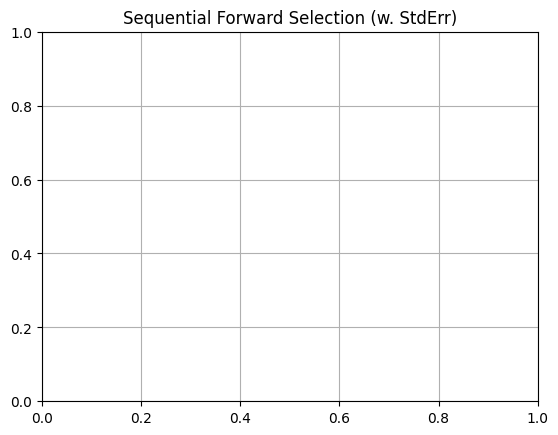

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

logreg1 = LogisticRegression()

sfs = SFS(estimator=logreg1, 
           k_features=5,
           forward=True, 
           floating=False, 
           scoring='roc_auc',
           cv=5)

gs = sfs.fit(X_train, y_train)

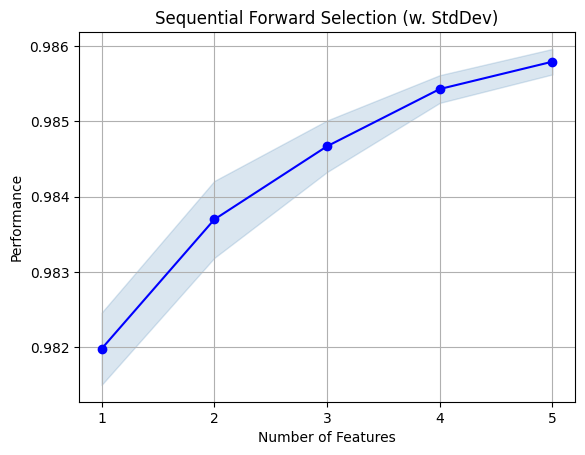

In [27]:
fig = plot_sfs(sfs.get_metric_dict(), kind='ci')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

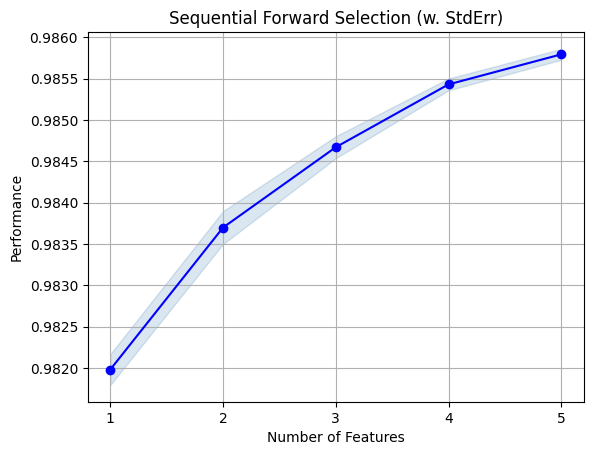

In [21]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()